In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

df = pd.read_csv('loan-train.csv')

In [3]:
df.head(5).T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [4]:
df = df.drop('Loan_ID', axis=1)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Categorical
for df in [df]:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Numerical
for df in [df ]:
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
print("Modified df_train:")
print(df.isnull().sum())



Modified df_train:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_4112\4275334318.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4112\4275334318.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

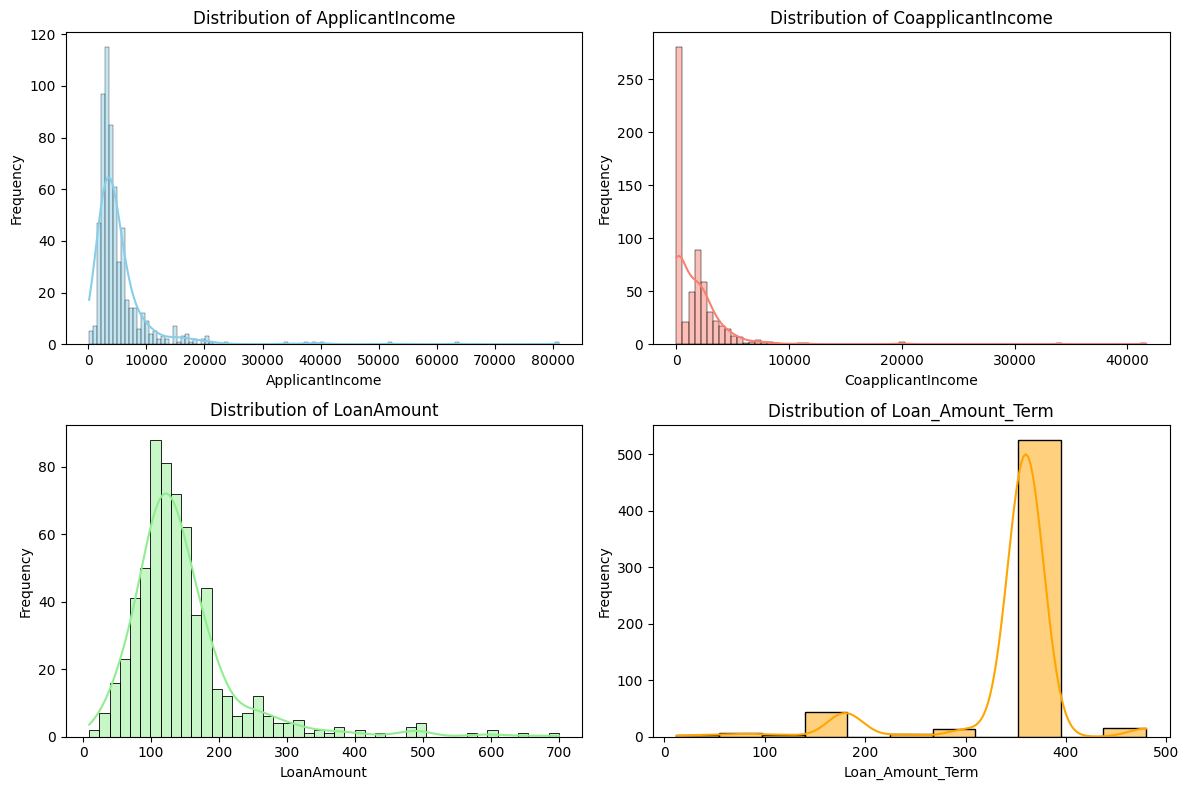

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for visualization
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plotting histograms for numerical features with different colors
plt.figure(figsize=(12, 8))
for i, (feature, color) in enumerate(zip(features, colors), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


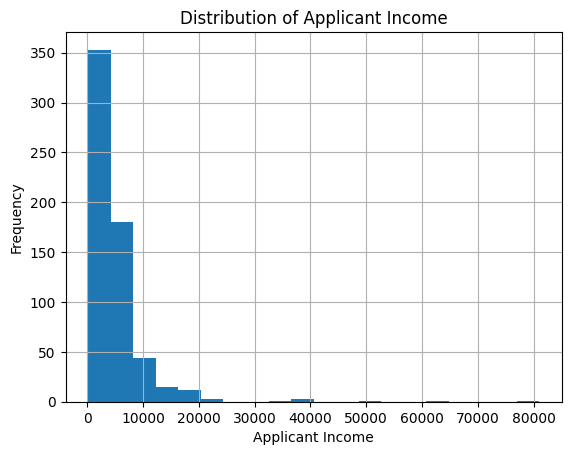

In [11]:
df['ApplicantIncome'].hist(bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

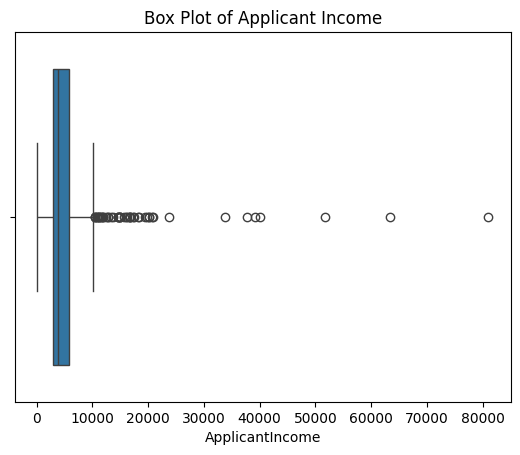

In [12]:
sns.boxplot(x='ApplicantIncome', data=df)
plt.title('Box Plot of Applicant Income')
plt.show()

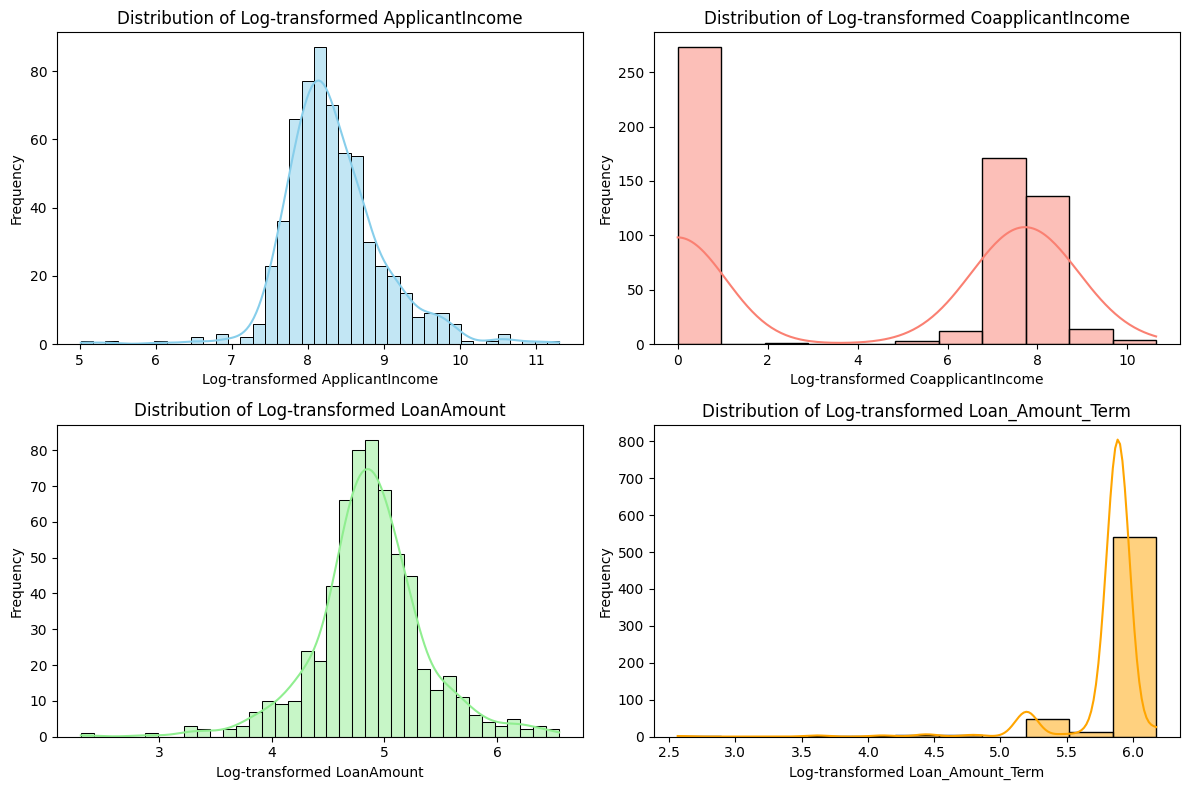

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already defined
# Selecting numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply logarithmic transformation to numerical features
for column in numerical_columns:
    df[column + '_log'] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)

# Define colors for each plot
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot the distribution of transformed features
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(numerical_columns, colors), 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column + '_log'], kde=True, color=color)
    plt.title(f'Distribution of Log-transformed {column}')
    plt.xlabel(f'Log-transformed {column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


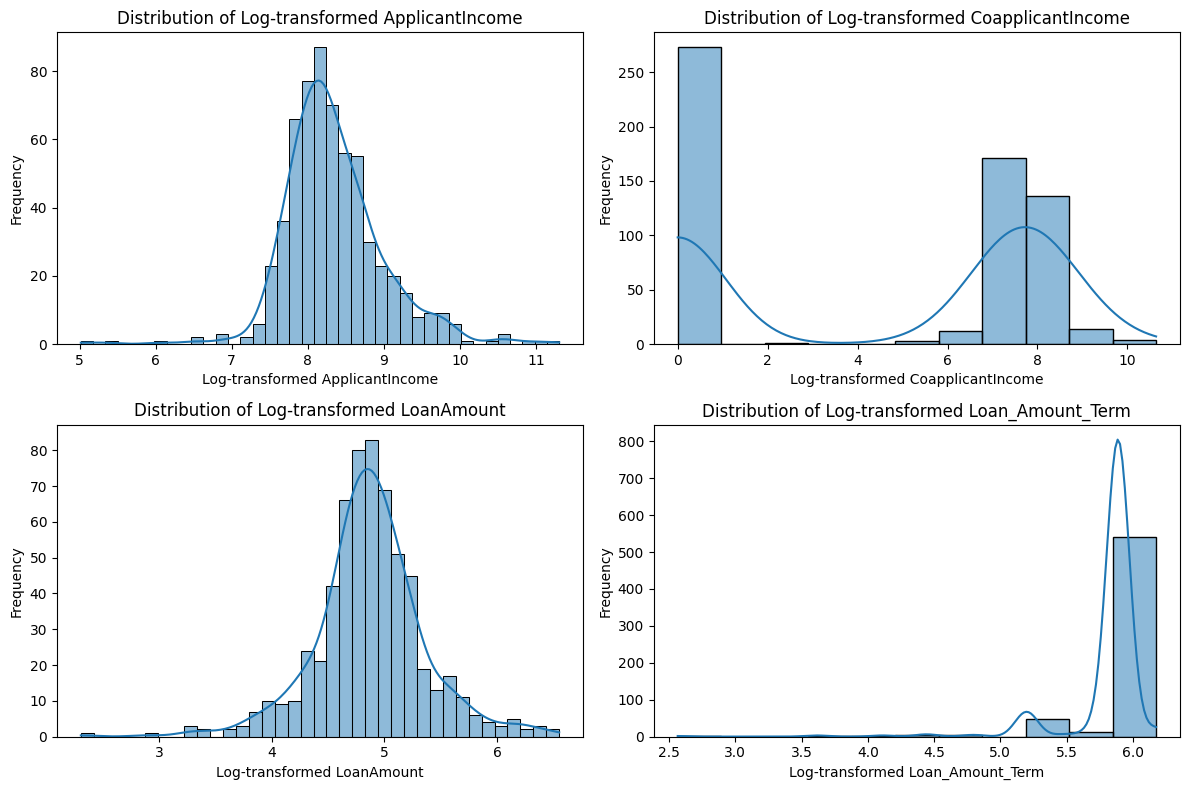

In [14]:
# Selecting numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply logarithmic transformation to numerical features
for column in numerical_columns:
    df[column + '_log'] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)

# Plot the distribution of transformed features
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column + '_log'], kde=True)
    plt.title(f'Distribution of Log-transformed {column}')
    plt.xlabel(f'Log-transformed {column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

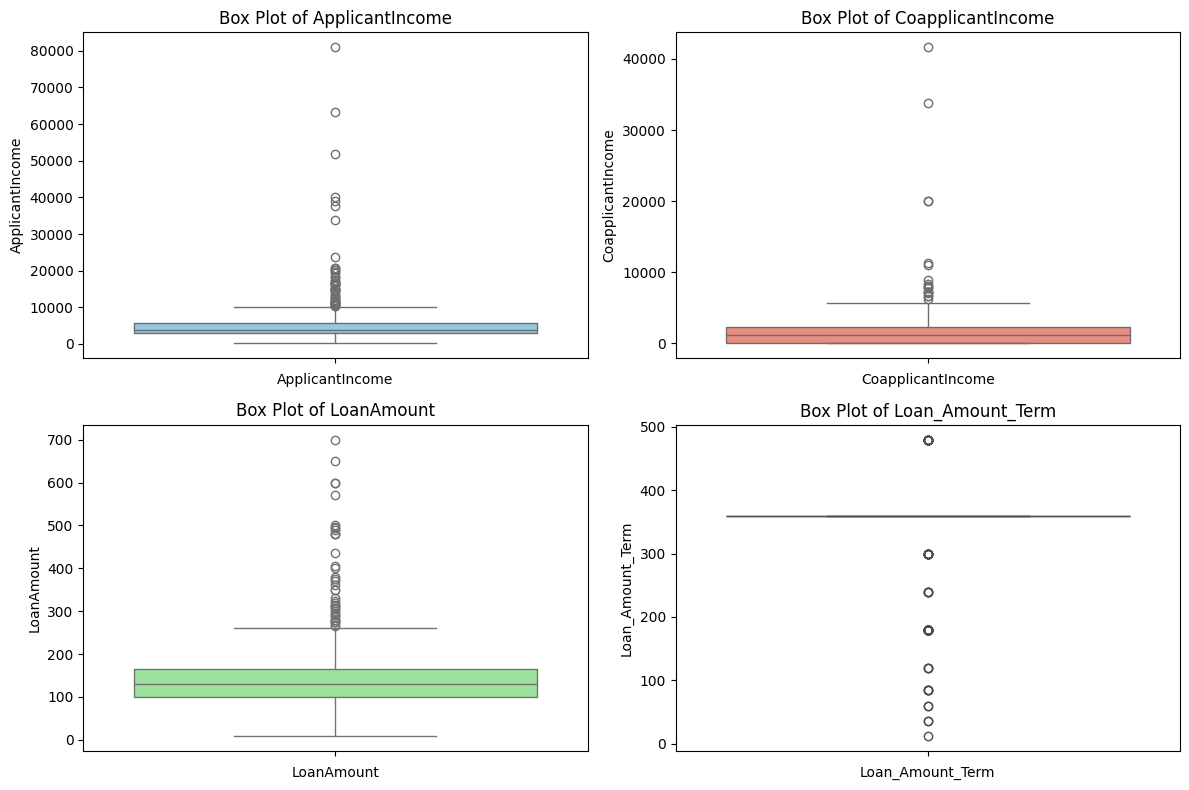

In [15]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plotting box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(numerical_columns, colors), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[column], color=color)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

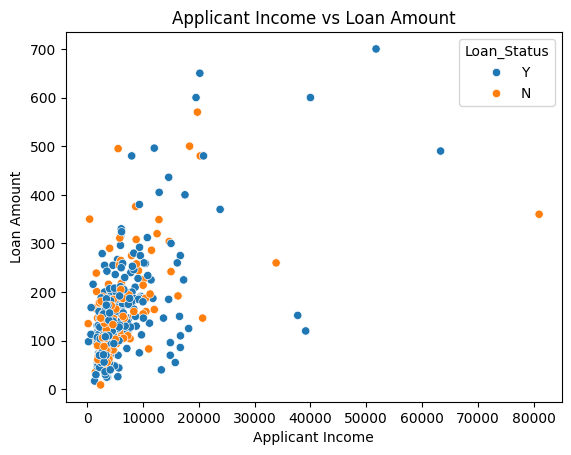

In [16]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()

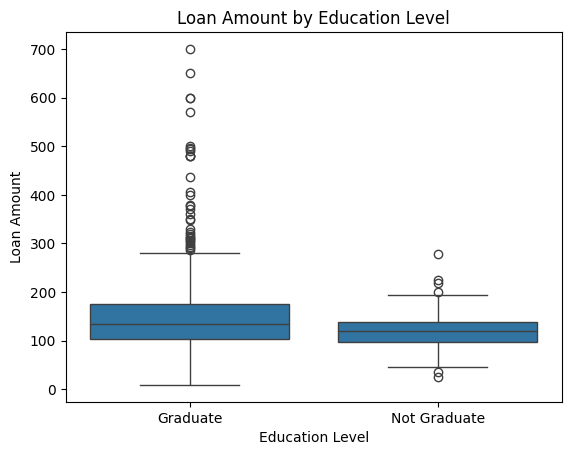

In [17]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.xlabel('Education Level')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Education Level')
plt.show()

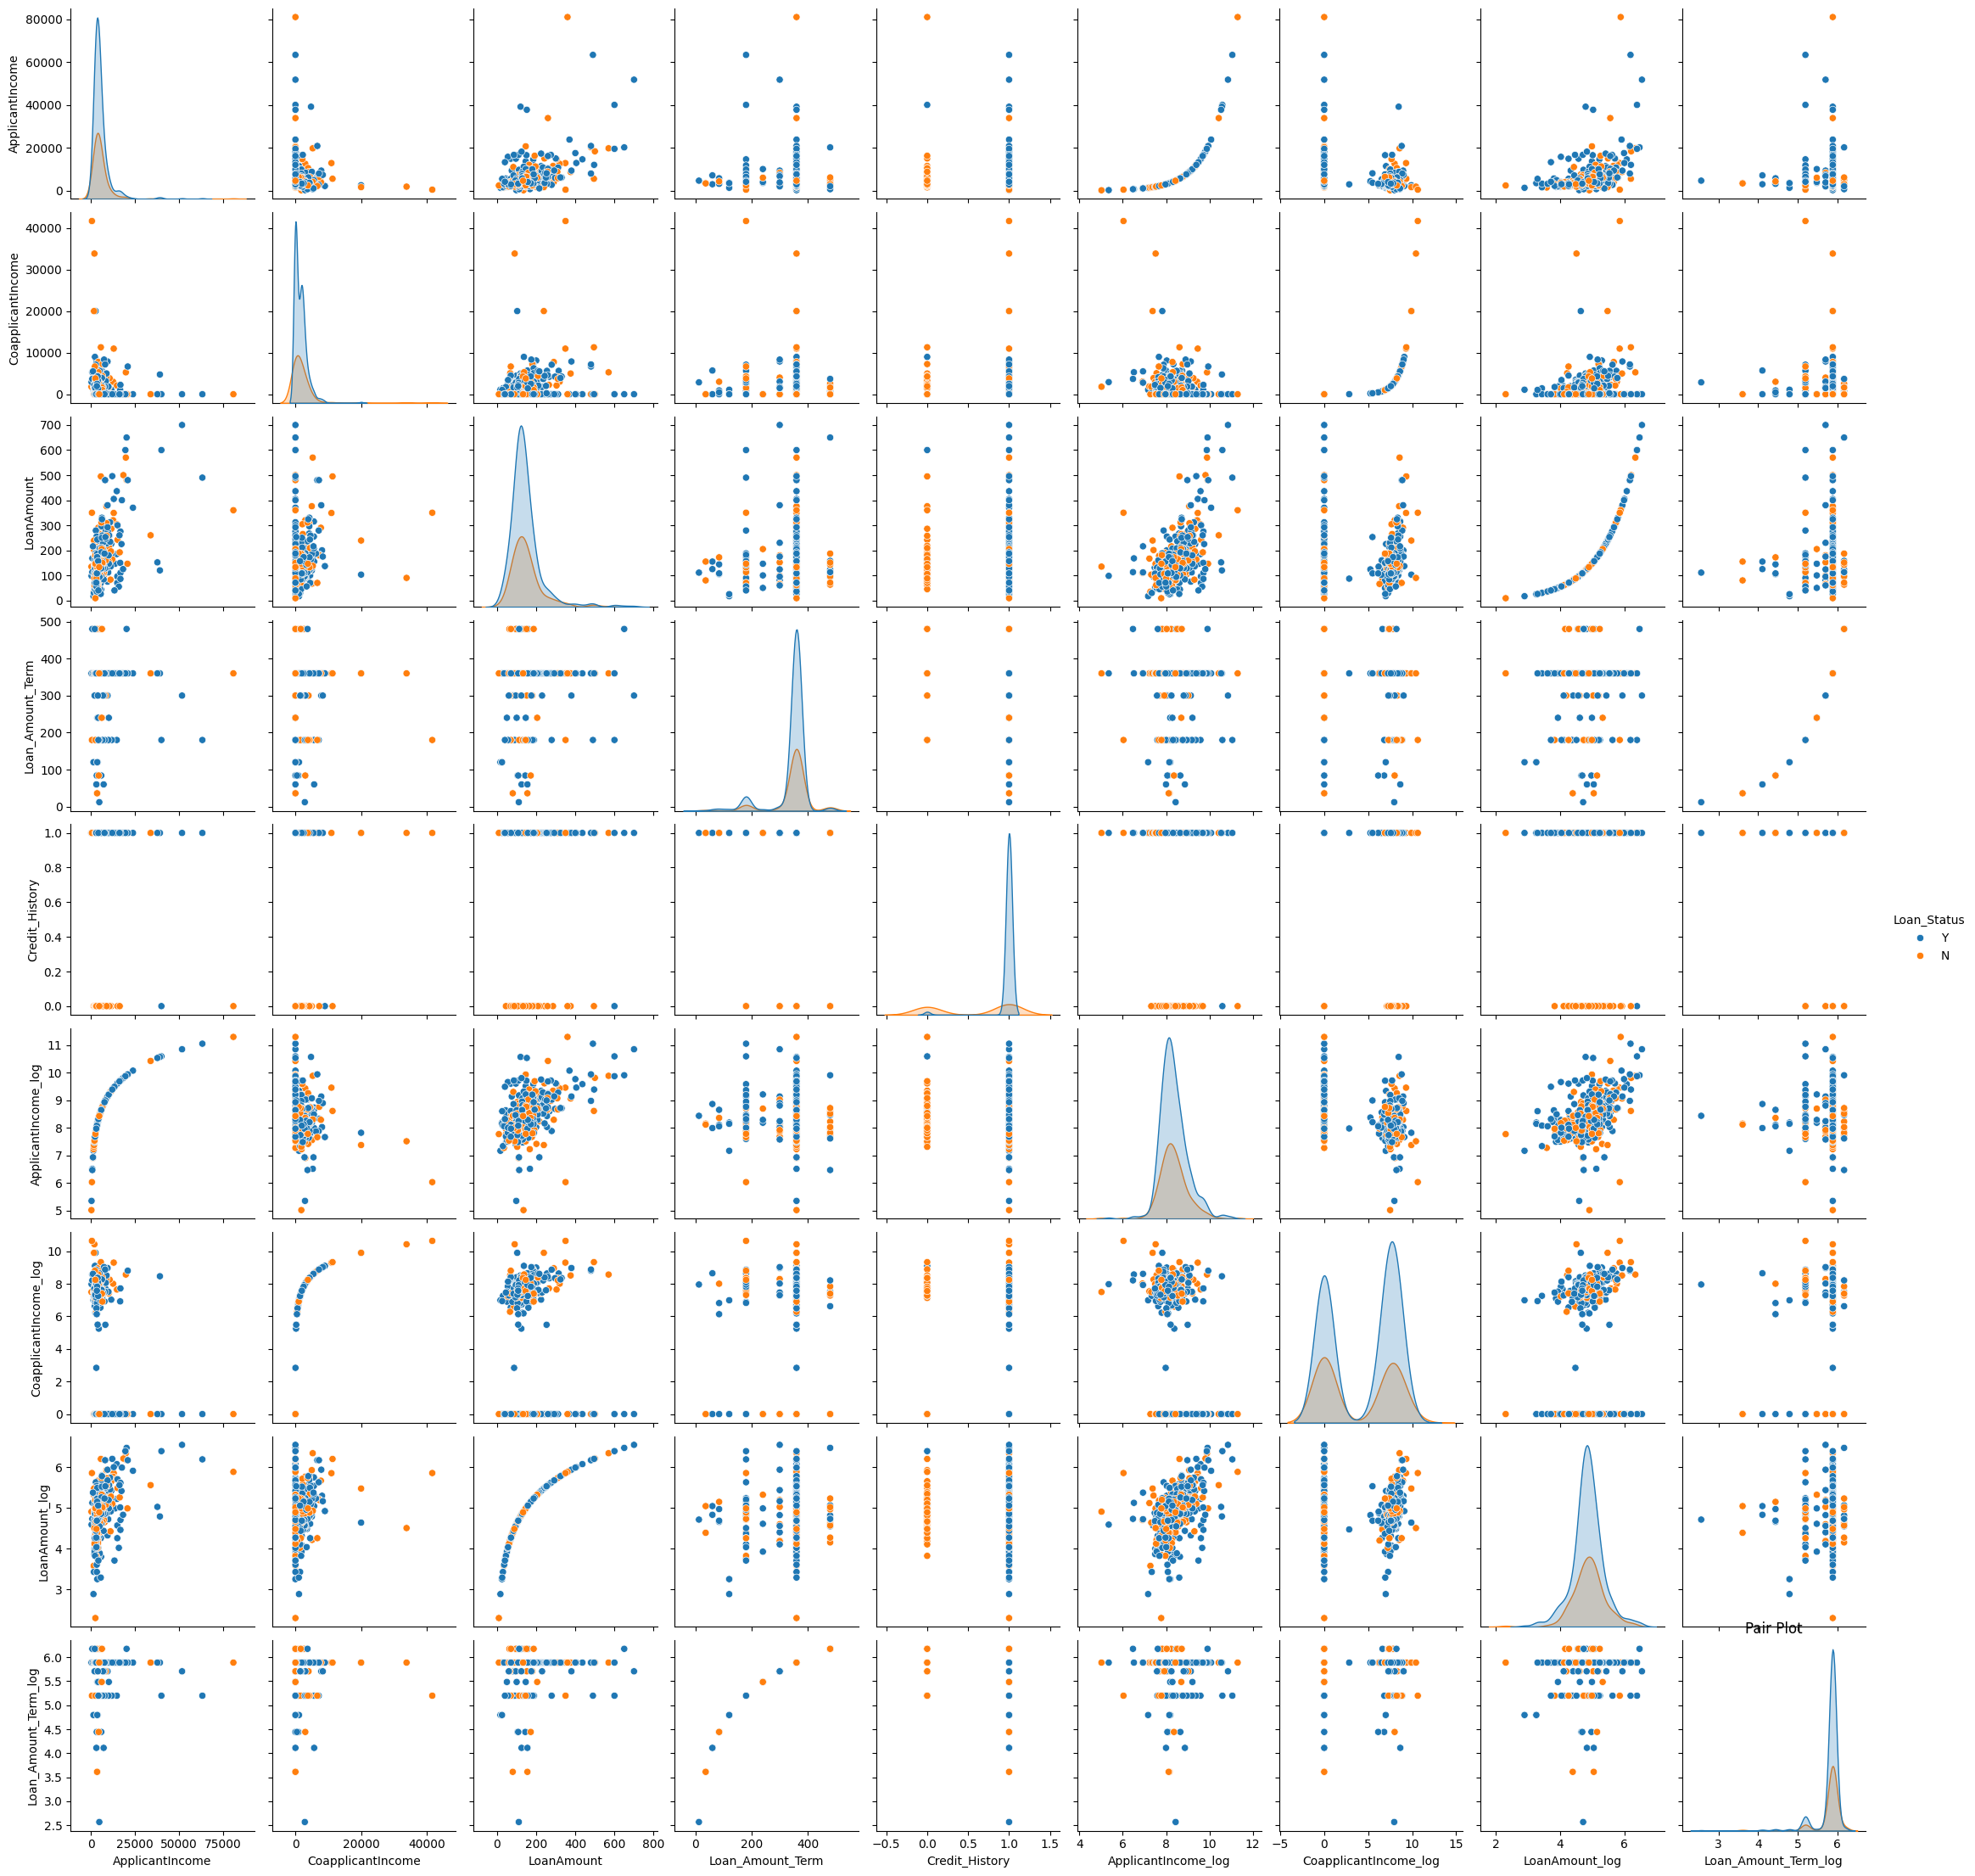

In [18]:
sns.pairplot(df, hue='Loan_Status')
plt.title('Pair Plot')
plt.show()

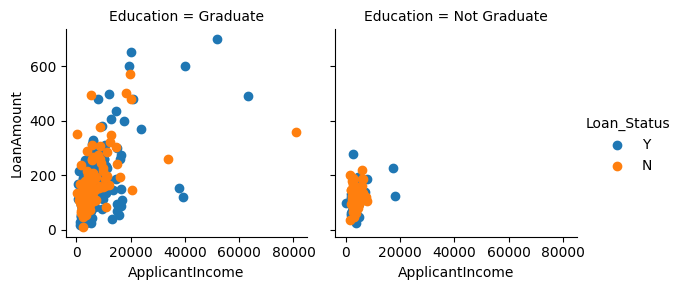

In [19]:
g = sns.FacetGrid(df, col='Education', hue='Loan_Status')
g.map(plt.scatter, 'ApplicantIncome', 'LoanAmount')
g.add_legend()
plt.show()

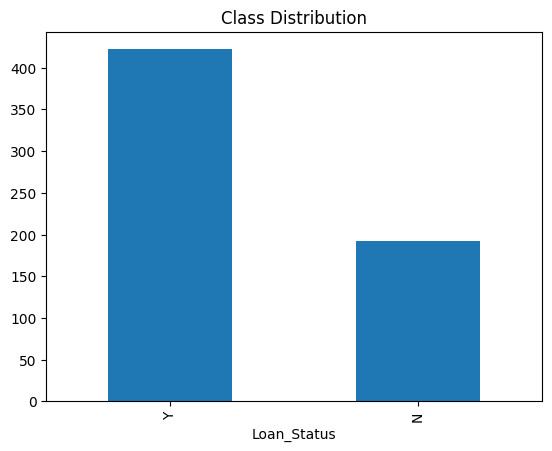

In [20]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878


In [22]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [23]:
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,146.412162,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [24]:
df['Property_Area'].unique

<bound method Series.unique of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 614 non-null    object 
 1   Married                614 non-null    object 
 2   Dependents             614 non-null    object 
 3   Education              614 non-null    object 
 4   Self_Employed          614 non-null    object 
 5   ApplicantIncome        614 non-null    int64  
 6   CoapplicantIncome      614 non-null    float64
 7   LoanAmount             614 non-null    float64
 8   Loan_Amount_Term       614 non-null    float64
 9   Credit_History         614 non-null    float64
 10  Property_Area          614 non-null    object 
 11  Loan_Status            614 non-null    object 
 12  ApplicantIncome_log    614 non-null    float64
 13  CoapplicantIncome_log  614 non-null    float64
 14  LoanAmount_log         614 non-null    float64
 15  Loan_A

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [27]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 614 non-null    object 
 1   Married                614 non-null    object 
 2   Dependents             614 non-null    int32  
 3   Education              614 non-null    object 
 4   Self_Employed          614 non-null    object 
 5   ApplicantIncome        614 non-null    int64  
 6   CoapplicantIncome      614 non-null    float64
 7   LoanAmount             614 non-null    float64
 8   Loan_Amount_Term       614 non-null    float64
 9   Credit_History         614 non-null    float64
 10  Property_Area          614 non-null    object 
 11  Loan_Status            614 non-null    object 
 12  ApplicantIncome_log    614 non-null    float64
 13  CoapplicantIncome_log  614 non-null    float64
 14  LoanAmount_log         614 non-null    float64
 15  Loan_A

In [29]:
# Convert Categories column to binary
df['gender_snum'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['married_snum'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education_snum'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed_snum'] = df['Self_Employed'].map({"Yes": 1, "No": 0})
df['Property_Area_snum'] = df['Property_Area'].map({'Urban': 0, 'Rural': 1,'Semiurban':2})
df['Loan_Status_snum'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,gender_snum,married_snum,Education_snum,Self_Employed_snum,Property_Area_snum,Loan_Status_snum
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,8.674197,0.000000,4.993232,5.888878,0,0,1,0,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,8.430327,7.319202,4.859812,5.888878,0,1,1,0,1,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,8.006701,0.000000,4.204693,5.888878,0,1,1,1,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,7.857094,7.765993,4.795791,5.888878,0,1,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,8.699681,0.000000,4.955827,5.888878,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,...,7.972811,0.000000,4.276666,5.888878,1,0,1,0,1,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,...,8.320448,0.000000,3.713572,5.198497,0,1,1,0,1,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,...,8.996280,5.484797,5.537334,5.888878,0,1,1,0,0,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,...,8.933796,0.000000,5.236442,5.888878,0,1,1,0,0,1


In [30]:
df.to_excel("output.xlsx", index=False)

In [31]:
new_order = [
    'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status',  # Object columns
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Dependents', 'Credit_History',        # Numerical columns
    'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log', 'Loan_Amount_Term_log',          # Log-transformed columns
    'gender_snum', 'married_snum', 'Education_snum', 'Self_Employed_snum', 'Property_Area_snum', 'Loan_Status_snum'  # Numerical encoding columns
]

# Rearrange the columns
df= df[new_order]
df.head(5).T


,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
Property_Area,Urban,Rural,Urban,Urban,Urban
Loan_Status,Y,N,Y,Y,Y
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,146.412162,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [32]:
df_num= df.select_dtypes(include=['int64', 'float64','int32']).columns
df_corr = df[df_num]
exclude_columns = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# Drop the specified columns
df_num = df_num.drop(exclude_columns)

# Create a new DataFrame with the remaining numerical columns
df_corr = df[df_num]
df_corr

,Dependents,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,gender_snum,married_snum,Education_snum,Self_Employed_snum,Property_Area_snum,Loan_Status_snum
0,0,1.0,8.674197,0.000000,4.993232,5.888878,0,0,1,0,0,1
1,1,1.0,8.430327,7.319202,4.859812,5.888878,0,1,1,0,1,0
2,0,1.0,8.006701,0.000000,4.204693,5.888878,0,1,1,1,0,1
3,0,1.0,7.857094,7.765993,4.795791,5.888878,0,1,0,0,0,1
4,0,1.0,8.699681,0.000000,4.955827,5.888878,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1.0,7.972811,0.000000,4.276666,5.888878,1,0,1,0,1,1
610,3,1.0,8.320448,0.000000,3.713572,5.198497,0,1,1,0,1,1
611,1,1.0,8.996280,5.484797,5.537334,5.888878,0,1,1,0,0,1
612,2,1.0,8.933796,0.000000,5.236442,5.888878,0,1,1,0,0,1


In [33]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Dependents,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,gender_snum,married_snum,Education_snum,Self_Employed_snum,Property_Area_snum,Loan_Status_snum
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.744300,0.855049,8.341510,4.290129,4.870872,5.806547,0.182410,0.653094,0.781759,0.133550,1.050489,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,1.009623,0.352339,0.645035,3.875873,0.491376,0.309785,0.386497,0.476373,0.413389,0.340446,0.840875,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,5.017280,0.000000,2.302585,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,0.000000,1.000000,7.965024,0.000000,4.617584,5.888878,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,0.000000,1.000000,8.246303,7.081125,4.867534,5.888878,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,8.664922,7.739897,5.110477,5.888878,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,3.000000,1.000000,11.302217,10.637489,6.552508,6.175867,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [34]:
df_corr.describe()

,Dependents,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,gender_snum,married_snum,Education_snum,Self_Employed_snum,Property_Area_snum,Loan_Status_snum
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,0.855049,8.341510,4.290129,4.870872,5.806547,0.182410,0.653094,0.781759,0.133550,1.050489,0.687296
std,1.009623,0.352339,0.645035,3.875873,0.491376,0.309785,0.386497,0.476373,0.413389,0.340446,0.840875,0.463973
min,0.000000,0.000000,5.017280,0.000000,2.302585,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.965024,0.000000,4.617584,5.888878,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,8.246303,7.081125,4.867534,5.888878,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,8.664922,7.739897,5.110477,5.888878,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,3.000000,1.000000,11.302217,10.637489,6.552508,6.175867,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


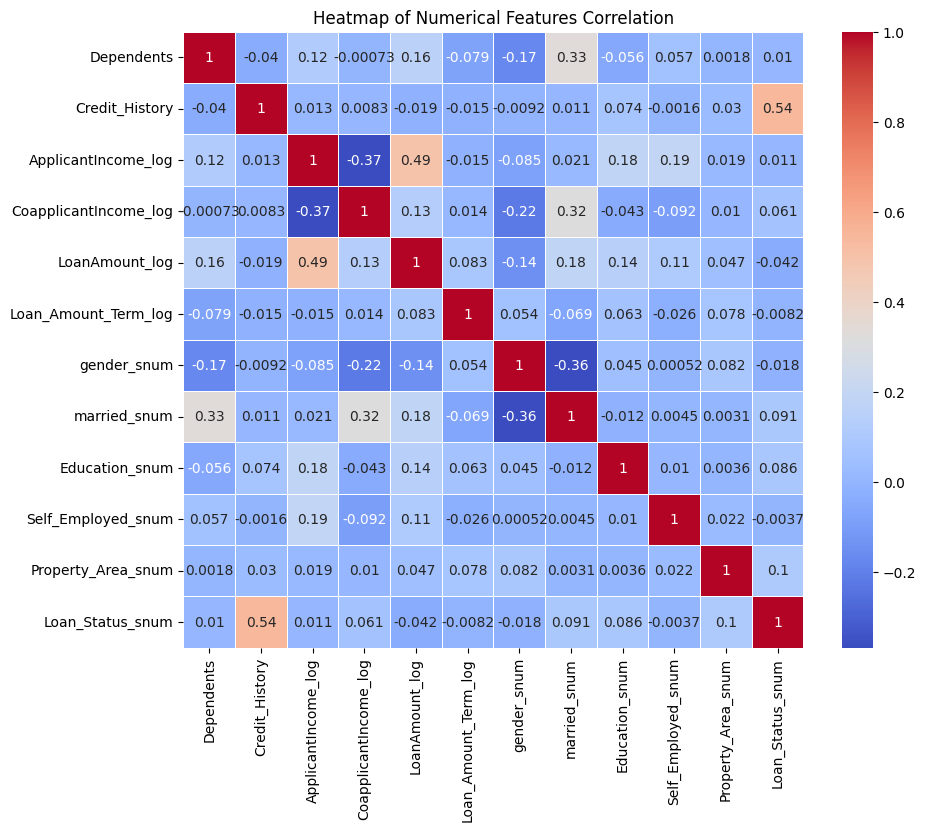

In [35]:
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

In [36]:
df_corr.head()

,Dependents,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,gender_snum,married_snum,Education_snum,Self_Employed_snum,Property_Area_snum,Loan_Status_snum
0,0,1.0,8.674197,0.000000,4.993232,5.888878,0,0,1,0,0,1
1,1,1.0,8.430327,7.319202,4.859812,5.888878,0,1,1,0,1,0
2,0,1.0,8.006701,0.000000,4.204693,5.888878,0,1,1,1,0,1
3,0,1.0,7.857094,7.765993,4.795791,5.888878,0,1,0,0,0,1
4,0,1.0,8.699681,0.000000,4.955827,5.888878,0,0,1,0,0,1


## Machine learning 

In [37]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
X = df_corr.drop(["Loan_Status_snum"], axis=1)
y = df_corr["Loan_Status_snum"]

In [39]:
X = RobustScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

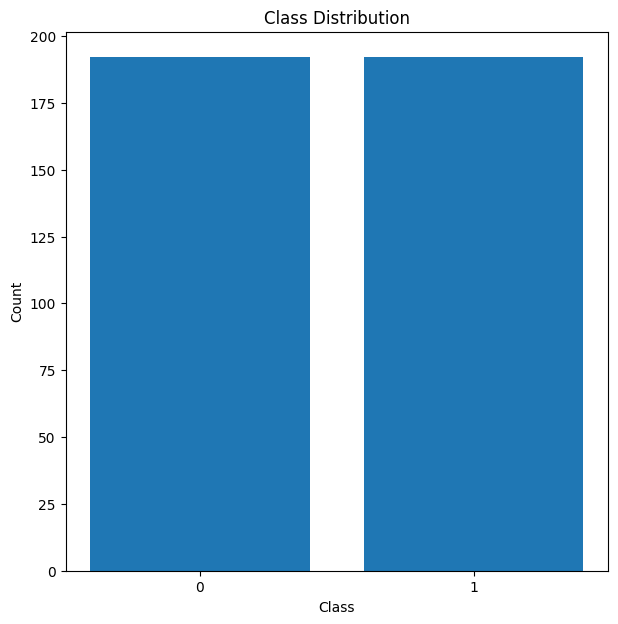

In [40]:
# Use Random Under Sampling to balance the data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_RUS, y_resampled_RUS = rus.fit_resample(X, y)
# Plot class distribution in bar
plt.figure(figsize=(7, 7))
plt.bar(np.unique(y_resampled_RUS), np.bincount(y_resampled_RUS))
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## SMOTE 

([<matplotlib.axis.XTick at 0x1d155d29890>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

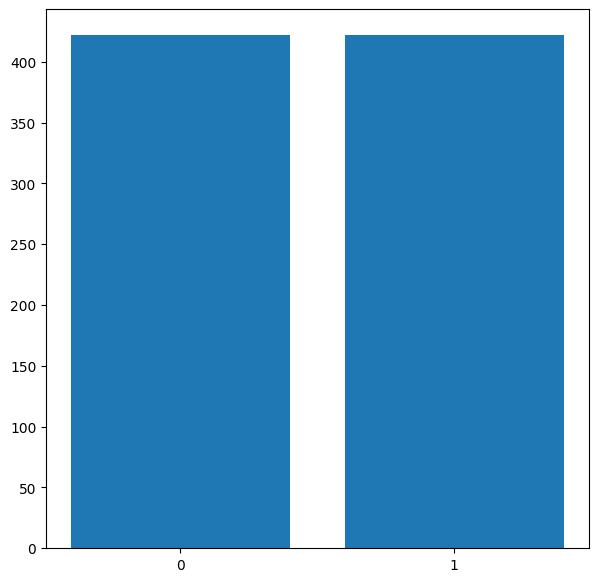

In [41]:
# Use SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X, y)
# Plot class distribution in bar
plt.figure(figsize=(7, 7))
plt.bar(np.unique(y_resampled_SMOTE), np.bincount(y_resampled_SMOTE))
plt.xticks([0, 1])

## Train test split 

In [42]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS =train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2,random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE =train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2,random_state=0)

## Logistic Regression 

## Random Forest 

## Decision Tree 

## SVM

## KNN

## Compare All the models 

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [45]:


# Split the data into training and testing sets
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2, random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2, random_state=0)

# Initialize and train the Logistic Regression model
log_reg_RUS = LogisticRegression(random_state=0)
log_reg_RUS.fit(X_train_RUS, y_train_RUS)

# Predict and evaluate on RUS test set
y_pred_RUS = log_reg_RUS.predict(X_test_RUS)
cm_RUS = confusion_matrix(y_test_RUS, y_pred_RUS)
precision_RUS, recall_RUS, f1_RUS, accuracy_RUS = precision_score(y_test_RUS, y_pred_RUS), recall_score(y_test_RUS, y_pred_RUS), f1_score(y_test_RUS, y_pred_RUS), accuracy_score(y_test_RUS, y_pred_RUS)
tn, fp, fn, tp = cm_RUS.ravel()
specificity_RUS = tn / (tn + fp)

print(f"Logistic Regression with RUS - Precision: {precision_RUS:.8f}, Recall: {recall_RUS:.8f}, F1-score: {f1_RUS:.8f}, Specificity: {specificity_RUS:.8f}, Accuracy: {accuracy_RUS:.8f}")

# Initialize and train the Logistic Regression model
log_reg_SMOTE = LogisticRegression(random_state=0)
log_reg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate on SMOTE test set
y_pred_SMOTE = log_reg_SMOTE.predict(X_test_SMOTE)
cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
precision_SMOTE, recall_SMOTE, f1_SMOTE, accuracy_SMOTE = precision_score(y_test_SMOTE, y_pred_SMOTE), recall_score(y_test_SMOTE, y_pred_SMOTE), f1_score(y_test_SMOTE, y_pred_SMOTE), accuracy_score(y_test_SMOTE, y_pred_SMOTE)
tn, fp, fn, tp = cm_SMOTE.ravel()
specificity_SMOTE = tn / (tn + fp)

print(f"Logistic Regression with SMOTE - Precision: {precision_SMOTE:.8f}, Recall: {recall_SMOTE:.8f}, F1-score: {f1_SMOTE:.8f}, Specificity: {specificity_SMOTE:.8f}, Accuracy: {accuracy_SMOTE:.8f}")


Logistic Regression with RUS - Precision: 0.68888889, Recall: 0.77500000, F1-score: 0.72941176, Specificity: 0.62162162, Accuracy: 0.70129870
Logistic Regression with SMOTE - Precision: 0.66379310, Recall: 0.92771084, F1-score: 0.77386935, Specificity: 0.54651163, Accuracy: 0.73372781


In [46]:


# Split the data into training and testing sets
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2, random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2, random_state=0)

# Initialize and train the Random Forest model
rf_RUS = RandomForestClassifier(random_state=0)
rf_RUS.fit(X_train_RUS, y_train_RUS)

# Predict and evaluate on RUS test set
y_pred_RUS = rf_RUS.predict(X_test_RUS)
cm_RUS = confusion_matrix(y_test_RUS, y_pred_RUS)
precision_RUS, recall_RUS, f1_RUS, accuracy_RUS = precision_score(y_test_RUS, y_pred_RUS), recall_score(y_test_RUS, y_pred_RUS), f1_score(y_test_RUS, y_pred_RUS), accuracy_score(y_test_RUS, y_pred_RUS)
tn, fp, fn, tp = cm_RUS.ravel()
specificity_RUS = tn / (tn + fp)

print(f"Random Forest with RUS - Precision: {precision_RUS:.8f}, Recall: {recall_RUS:.8f}, F1-score: {f1_RUS:.8f}, Specificity: {specificity_RUS:.8f}, Accuracy: {accuracy_RUS:.8f}")

# Initialize and train the Random Forest model
rf_SMOTE = RandomForestClassifier(random_state=0)
rf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate on SMOTE test set
y_pred_SMOTE = rf_SMOTE.predict(X_test_SMOTE)
cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
precision_SMOTE, recall_SMOTE, f1_SMOTE, accuracy_SMOTE = precision_score(y_test_SMOTE, y_pred_SMOTE), recall_score(y_test_SMOTE, y_pred_SMOTE), f1_score(y_test_SMOTE, y_pred_SMOTE), accuracy_score(y_test_SMOTE, y_pred_SMOTE)
tn, fp, fn, tp = cm_SMOTE.ravel()
specificity_SMOTE = tn / (tn + fp)

print(f"Random Forest with SMOTE - Precision: {precision_SMOTE:.8f}, Recall: {recall_SMOTE:.8f}, F1-score: {f1_SMOTE:.8f}, Specificity: {specificity_SMOTE:.8f}, Accuracy: {accuracy_SMOTE:.8f}")


Random Forest with RUS - Precision: 0.65116279, Recall: 0.70000000, F1-score: 0.67469880, Specificity: 0.59459459, Accuracy: 0.64935065
Random Forest with SMOTE - Precision: 0.77083333, Recall: 0.89156627, F1-score: 0.82681564, Specificity: 0.74418605, Accuracy: 0.81656805


In [47]:


# Split the data into training and testing sets
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2, random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2, random_state=0)

# Initialize and train the Decision Tree model
dt_RUS = DecisionTreeClassifier(random_state=0)
dt_RUS.fit(X_train_RUS, y_train_RUS)

# Predict and evaluate on RUS test set
y_pred_RUS = dt_RUS.predict(X_test_RUS)
cm_RUS = confusion_matrix(y_test_RUS, y_pred_RUS)
precision_RUS, recall_RUS, f1_RUS, accuracy_RUS = precision_score(y_test_RUS, y_pred_RUS), recall_score(y_test_RUS, y_pred_RUS), f1_score(y_test_RUS, y_pred_RUS), accuracy_score(y_test_RUS, y_pred_RUS)
tn, fp, fn, tp = cm_RUS.ravel()
specificity_RUS = tn / (tn + fp)

print(f"Decision Tree with RUS - Precision: {precision_RUS:.8f}, Recall: {recall_RUS:.8f}, F1-score: {f1_RUS:.8f}, Specificity: {specificity_RUS:.8f}, Accuracy: {accuracy_RUS:.8f}")

# Initialize and train the Decision Tree model
dt_SMOTE = DecisionTreeClassifier(random_state=0)
dt_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate on SMOTE test set
y_pred_SMOTE = dt_SMOTE.predict(X_test_SMOTE)
cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
precision_SMOTE, recall_SMOTE, f1_SMOTE, accuracy_SMOTE = precision_score(y_test_SMOTE, y_pred_SMOTE), recall_score(y_test_SMOTE, y_pred_SMOTE), f1_score(y_test_SMOTE, y_pred_SMOTE), accuracy_score(y_test_SMOTE, y_pred_SMOTE)
tn, fp, fn, tp = cm_SMOTE.ravel()
specificity_SMOTE = tn / (tn + fp)

print(f"Decision Tree with SMOTE - Precision: {precision_SMOTE:.8f}, Recall: {recall_SMOTE:.8f}, F1-score: {f1_SMOTE:.8f}, Specificity: {specificity_SMOTE:.8f}, Accuracy: {accuracy_SMOTE:.8f}")


Decision Tree with RUS - Precision: 0.68571429, Recall: 0.60000000, F1-score: 0.64000000, Specificity: 0.70270270, Accuracy: 0.64935065
Decision Tree with SMOTE - Precision: 0.77500000, Recall: 0.74698795, F1-score: 0.76073620, Specificity: 0.79069767, Accuracy: 0.76923077


In [48]:

# Split the data into training and testing sets
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2, random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2, random_state=0)

# Initialize and train the SVM model
svm_RUS = SVC(random_state=0)
svm_RUS.fit(X_train_RUS, y_train_RUS)

# Predict and evaluate on RUS test set
y_pred_RUS = svm_RUS.predict(X_test_RUS)
cm_RUS = confusion_matrix(y_test_RUS, y_pred_RUS)
precision_RUS, recall_RUS, f1_RUS, accuracy_RUS = precision_score(y_test_RUS, y_pred_RUS), recall_score(y_test_RUS, y_pred_RUS), f1_score(y_test_RUS, y_pred_RUS), accuracy_score(y_test_RUS, y_pred_RUS)
tn, fp, fn, tp = cm_RUS.ravel()
specificity_RUS = tn / (tn + fp)

print(f"SVM with RUS - Precision: {precision_RUS:.8f}, Recall: {recall_RUS:.8f}, F1-score: {f1_RUS:.8f}, Specificity: {specificity_RUS:.8f}, Accuracy: {accuracy_RUS:.8f}")

# Initialize and train the SVM model
svm_SMOTE = SVC(random_state=0)
svm_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate on SMOTE test set
y_pred_SMOTE = svm_SMOTE.predict(X_test_SMOTE)
cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
precision_SMOTE, recall_SMOTE, f1_SMOTE, accuracy_SMOTE = precision_score(y_test_SMOTE, y_pred_SMOTE), recall_score(y_test_SMOTE, y_pred_SMOTE), f1_score(y_test_SMOTE, y_pred_SMOTE), accuracy_score(y_test_SMOTE, y_pred_SMOTE)
tn, fp, fn, tp = cm_SMOTE.ravel()
specificity_SMOTE = tn / (tn + fp)

print(f"SVM with SMOTE - Precision: {precision_SMOTE:.8f}, Recall: {recall_SMOTE:.8f}, F1-score: {f1_SMOTE:.8f}, Specificity: {specificity_SMOTE:.8f}, Accuracy: {accuracy_SMOTE:.8f}")


SVM with RUS - Precision: 0.65957447, Recall: 0.77500000, F1-score: 0.71264368, Specificity: 0.56756757, Accuracy: 0.67532468
SVM with SMOTE - Precision: 0.65254237, Recall: 0.92771084, F1-score: 0.76616915, Specificity: 0.52325581, Accuracy: 0.72189349


In [49]:


# Split the data into training and testing sets
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_resampled_RUS, y_resampled_RUS, test_size=0.2, random_state=0)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE, test_size=0.2, random_state=0)

# Initialize and train the KNN model
knn_RUS = KNeighborsClassifier()
knn_RUS.fit(X_train_RUS, y_train_RUS)

# Predict and evaluate on RUS test set
y_pred_RUS = knn_RUS.predict(X_test_RUS)
cm_RUS = confusion_matrix(y_test_RUS, y_pred_RUS)
precision_RUS, recall_RUS, f1_RUS, accuracy_RUS = precision_score(y_test_RUS, y_pred_RUS), recall_score(y_test_RUS, y_pred_RUS), f1_score(y_test_RUS, y_pred_RUS), accuracy_score(y_test_RUS, y_pred_RUS)
tn, fp, fn, tp = cm_RUS.ravel()
specificity_RUS = tn / (tn + fp)

print(f"KNN with RUS - Precision: {precision_RUS:.8f}, Recall: {recall_RUS:.8f}, F1-score: {f1_RUS:.8f}, Specificity: {specificity_RUS:.8f}, Accuracy: {accuracy_RUS:.8f}")

# Initialize and train the KNN model
knn_SMOTE = KNeighborsClassifier()
knn_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

# Predict and evaluate on SMOTE test set
y_pred_SMOTE = knn_SMOTE.predict(X_test_SMOTE)
cm_SMOTE = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)
precision_SMOTE, recall_SMOTE, f1_SMOTE, accuracy_SMOTE = precision_score(y_test_SMOTE, y_pred_SMOTE), recall_score(y_test_SMOTE, y_pred_SMOTE), f1_score(y_test_SMOTE, y_pred_SMOTE), accuracy_score(y_test_SMOTE, y_pred_SMOTE)
tn, fp, fn, tp = cm_SMOTE.ravel()
specificity_SMOTE = tn / (tn + fp)

print(f"KNN with SMOTE - Precision: {precision_SMOTE:.8f}, Recall: {recall_SMOTE:.8f}, F1-score: {f1_SMOTE:.8f}, Specificity: {specificity_SMOTE:.8f}, Accuracy: {accuracy_SMOTE:.8f}")


KNN with RUS - Precision: 0.62222222, Recall: 0.70000000, F1-score: 0.65882353, Specificity: 0.54054054, Accuracy: 0.62337662
KNN with SMOTE - Precision: 0.72839506, Recall: 0.71084337, F1-score: 0.71951220, Specificity: 0.74418605, Accuracy: 0.72781065


In [50]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'K Neighbors': KNeighborsClassifier(),
    'SVM': SVC(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0)
}

# Train and evaluate models for RUS
results_RUS = {}
for name, model in models.items():
    model.fit(X_train_RUS, y_train_RUS)
    y_pred_RUS = model.predict(X_test_RUS)
    accuracy = accuracy_score(y_test_RUS, y_pred_RUS)
    report = classification_report(y_test_RUS, y_pred_RUS, output_dict=True)
    results_RUS[name] = {'Accuracy': accuracy * 100, **report['weighted avg']}

compare_RUS = pd.DataFrame(results_RUS).T.rename_axis('Model')
compare_RUS = compare_RUS.drop(columns=['support'])
compare_RUS




,Accuracy,precision,recall,f1-score
Model,,,,
Logistic Regression,70.129870,0.703238,0.701299,0.699262
K Neighbors,62.337662,0.623557,0.623377,0.620808
SVM,67.532468,0.679000,0.675325,0.671426
Decision Tree,64.935065,0.653680,0.649351,0.648759
Random Forest,64.935065,0.649191,0.649351,0.648280


In [51]:
# Train and evaluate models for SMOTE
results_SMOTE = {}
for name, model in models.items():
    model.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred_SMOTE = model.predict(X_test_SMOTE)
    accuracy = accuracy_score(y_test_SMOTE, y_pred_SMOTE)
    report = classification_report(y_test_SMOTE, y_pred_SMOTE, output_dict=True)
    results_SMOTE[name] = {'Accuracy': accuracy * 100, **report['weighted avg']}

# # Create DataFrames for comparison for RUS and SMOTE
compare_SMOTE = pd.DataFrame(results_SMOTE).T.rename_axis('Model')

# Merge DataFrames for RUS and SMOTE
# compare = pd.merge(compare_RUS, compare_SMOTE, on='Model', suffixes=('_RUS', '_SMOTE'))

compare_SMOTE = compare_SMOTE.drop(columns=['support'])
compare_SMOTE_sorted = compare_SMOTE.sort_values(by=['Accuracy', 'f1-score'], ascending=False)
compare_SMOTE


,Accuracy,precision,recall,f1-score
Model,,,,
Logistic Regression,73.372781,0.777272,0.733728,0.724198
K Neighbors,72.781065,0.727824,0.727811,0.727715
SVM,72.189349,0.769487,0.721893,0.710582
Decision Tree,76.923077,0.769425,0.769231,0.769085
Random Forest,81.656805,0.824713,0.816568,0.815730


In [52]:
import pandas as pd

# Assuming compare_SMOTE and compare_RUS DataFrames are already created
# Rename 'Accuracy' columns for better distinction after merge
compare_SMOTE = compare_SMOTE.rename(columns={'Accuracy': 'Accuracy_SMOTE'})
compare_RUS = compare_RUS.rename(columns={'Accuracy': 'Accuracy_RUS'})

# Merge DataFrames on 'Model'
compare = pd.merge(compare_SMOTE[['Accuracy_SMOTE']], compare_RUS[['Accuracy_RUS']], on='Model')

# Display the comparison table
compare_sorted = compare.sort_values(by=['Accuracy_SMOTE', 'Accuracy_RUS'], ascending=False)
compare_sorted


,Accuracy_SMOTE,Accuracy_RUS
Model,,
Random Forest,81.656805,64.935065
Decision Tree,76.923077,64.935065
Logistic Regression,73.372781,70.129870
K Neighbors,72.781065,62.337662
SVM,72.189349,67.532468


In [53]:
#Test predict new data
new_data = [[1,0,0,1,0,146.412162,360.0,1,1,8.674026,1]]  # Add a missing feature
new_data =RobustScaler().fit_transform(new_data)
new_pred = rf_SMOTE.predict(new_data)
if new_pred == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")


Loan Approved


In [54]:
#Save Model and Deploy Model
import pickle
# save the model to disk
filename = 'finalized_model_G33.sav'
pickle.dump(rf_SMOTE, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_SMOTE, y_test_SMOTE)
print(result)


0.8165680473372781
